In [1]:
import ConstitutiveRelationships as CR
from baseUnits import ksi, MPa, kgf, kN, N, tf, mm, cm, m
import matplotlib.pyplot as plt


<Axes: xlabel='Strain', ylabel='Stress'>

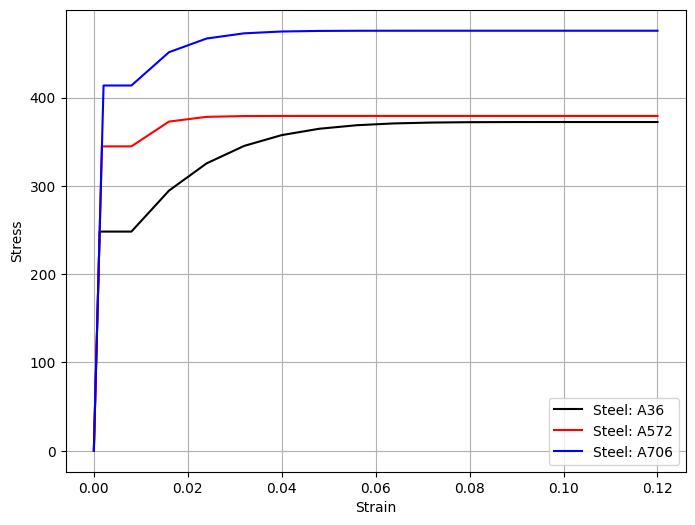

In [2]:
A36=CR.UniaxialBilinealSteel(
    name='A36',
    fy=36*ksi,
    fsu=1.5*36*ksi,
)

A572=CR.UniaxialBilinealSteel(
    name='A572',
    fy=50*ksi,
    fsu=1.1*50*ksi,
)

A706=CR.UniaxialBilinealSteel(
    name='A706',
    fy=60*ksi,
    fsu=1.15*60*ksi,
)

fig, ax = plt.subplots(figsize=(8,6))

ax.grid(True)

A36.plot(ax=ax, color='k')
A572.plot(ax=ax, color='r')
A706.plot(ax=ax, color='b')


In [4]:
fc240_UC=CR.UniaxialUnconfinedConcrete(
    name='fc240_UC',
    fco=240*kgf/cm**2
)

fc240_UC.to_excel()

[INFO] Excel exported successfully: c:\Users\nmora\Documents\GitHub\ConstitutiveRelationships\ConstitutiveRelationships\Ejemplos\fc240_UC_law.xlsx


WindowsPath('c:/Users/nmora/Documents/GitHub/ConstitutiveRelationships/ConstitutiveRelationships/Ejemplos/fc240_UC_law.xlsx')